In [1]:
import os
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stateCodes=pickle.load(open("stateCode.pickle","rb"))
paths=[str(i)+'/' for i in stateCodes]

yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
    
# New CARB
carbA=[6,41,53,8,16,31,40,49]
carbB=[9,10,23,24,25,34,36,42,44,50,11,13]

noState = ['"Guam"','"Puerto Rico"','"Hawaii"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]


In [3]:

data=OrderedDict()
for path in paths:
    key=path[:-1]
    for year in yearMap:
        extendedPath=path+"Data/o3/"+year
        counties=os.listdir(extendedPath)
        if key not in data:
            data[key]=OrderedDict()
        data[key][year]=len(counties)


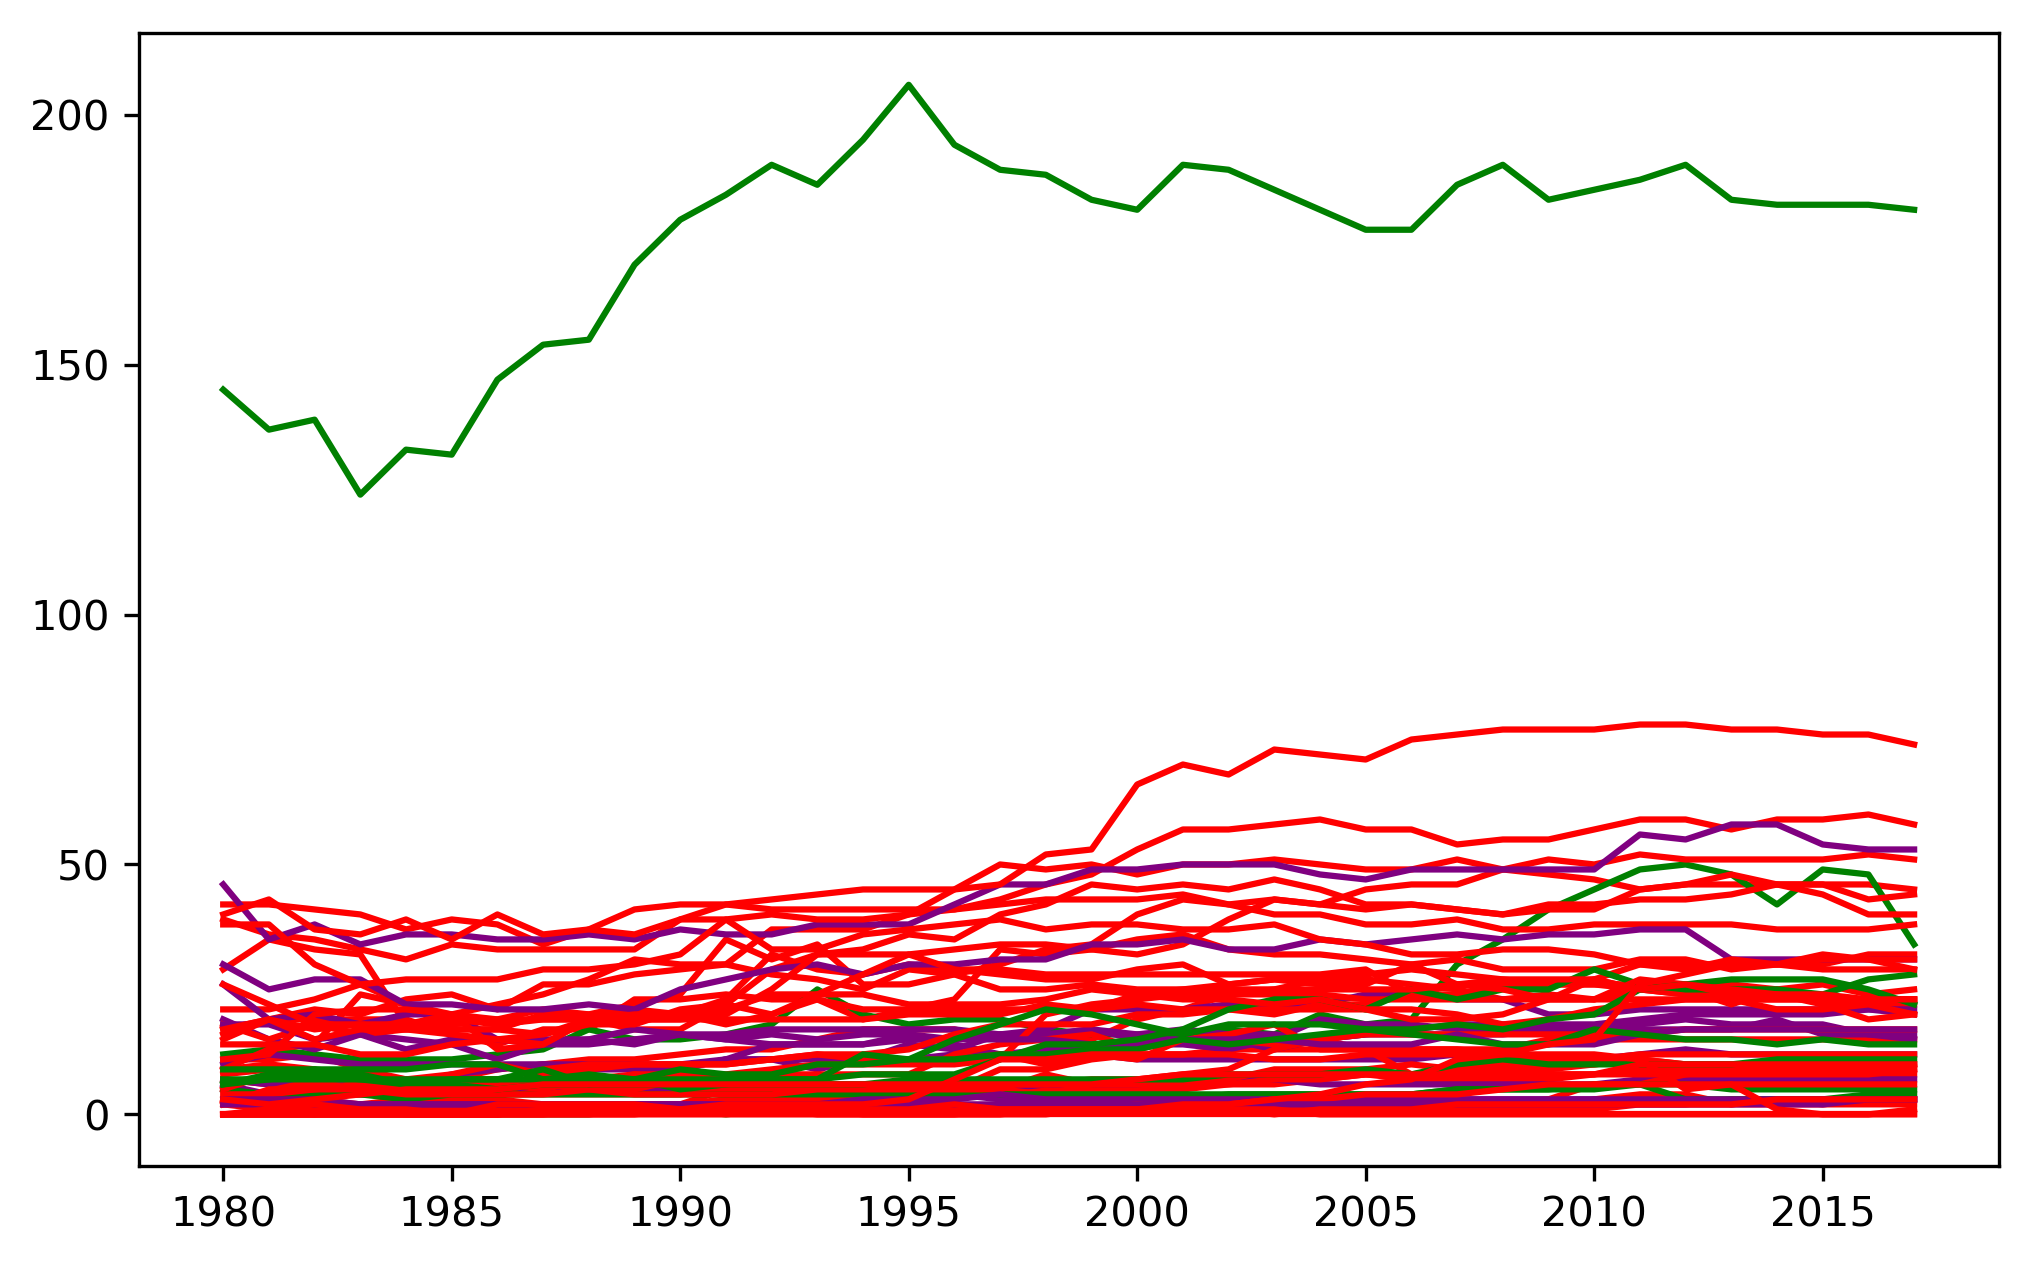

In [4]:
plt.close()
plt.subplots(figsize=(8,5),dpi=300)
for codes in data:
    intCode = int(codes)
    if intCode in carbA:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='g')
    elif intCode in carbB:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='purple')
    else:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='r')

plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
#plt.legend(loc='upper right') 
plt.show()

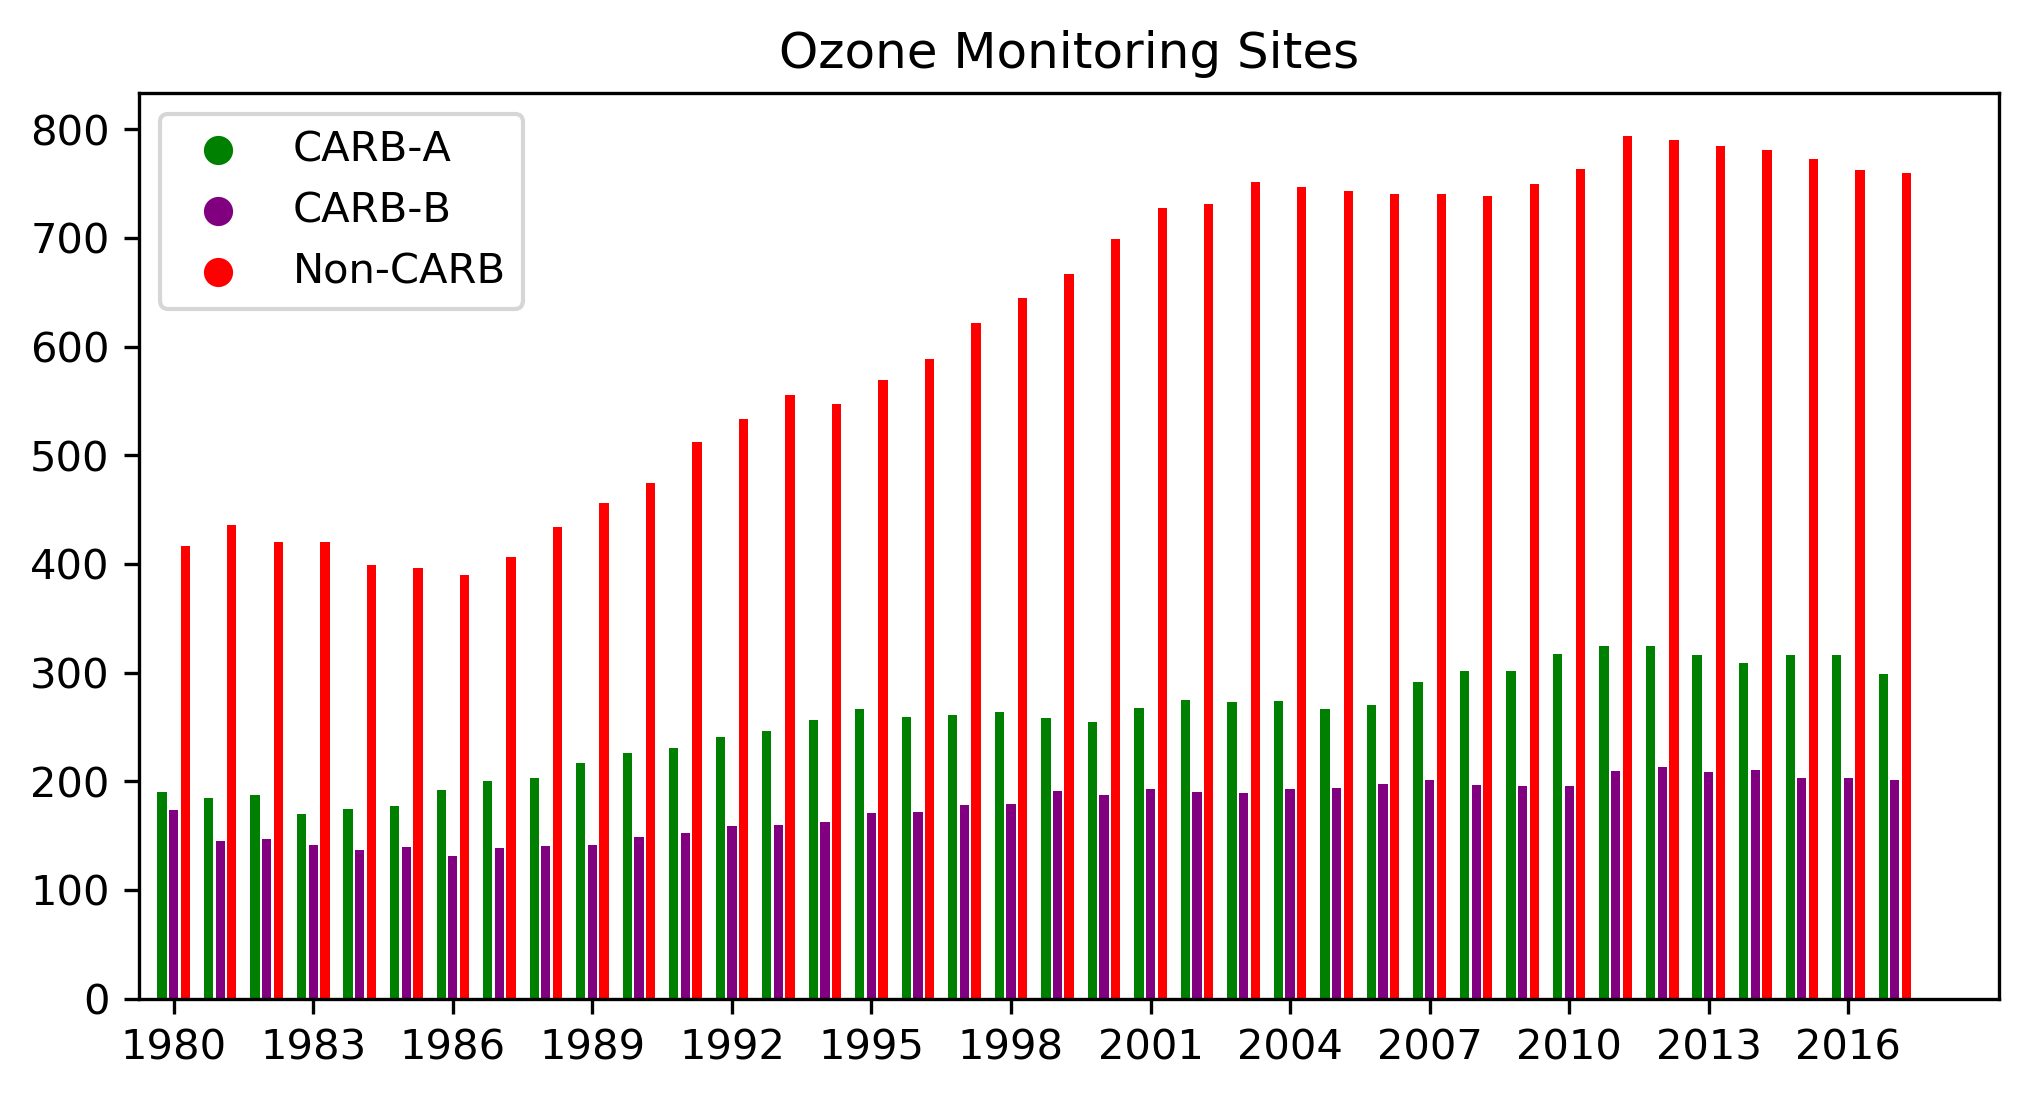

In [5]:
regionData=OrderedDict()
for codes in data:
    for year in data[codes]:
        if year not in regionData:
            regionData[year]={'A':0,'B':0,'O':0}
        intCode = int(codes)
        if intCode in carbA:
            regionData[year]['A']+=data[codes][year]
        elif intCode in carbB:
            regionData[year]['B']+=data[codes][year]
        elif intCode in nonCarb:
            regionData[year]['O']+=data[codes][year]
plt.close()
plt.subplots(figsize=(8,4),dpi=300)   

for year,index in zip(regionData,range(0,4*len(regionData),4)):
    #print(year,index,regionData[year]['A'])
    plt.bar(index-1,regionData[year]['A'],color='g')
    plt.bar(index,regionData[year]['B'],color='purple')
    plt.bar(index+1,regionData[year]['O'],color='r')

plt.xlim(-3,None)
plt.ylim(0,None)
plt.scatter(-5,-5,color='g',label='CARB-A')
plt.scatter(-5,-5,color='purple',label='CARB-B')
plt.scatter(-5,-5,color='r',label='Non-CARB')
plt.legend(loc='upper left')
plt.xticks(list(range(0,4*len(regionData),4))[::3],[i for i in data[codes]][::3])
plt.title("Ozone Monitoring Sites".format(stateCodes[int(codes)].replace('"','')))
plt.show()

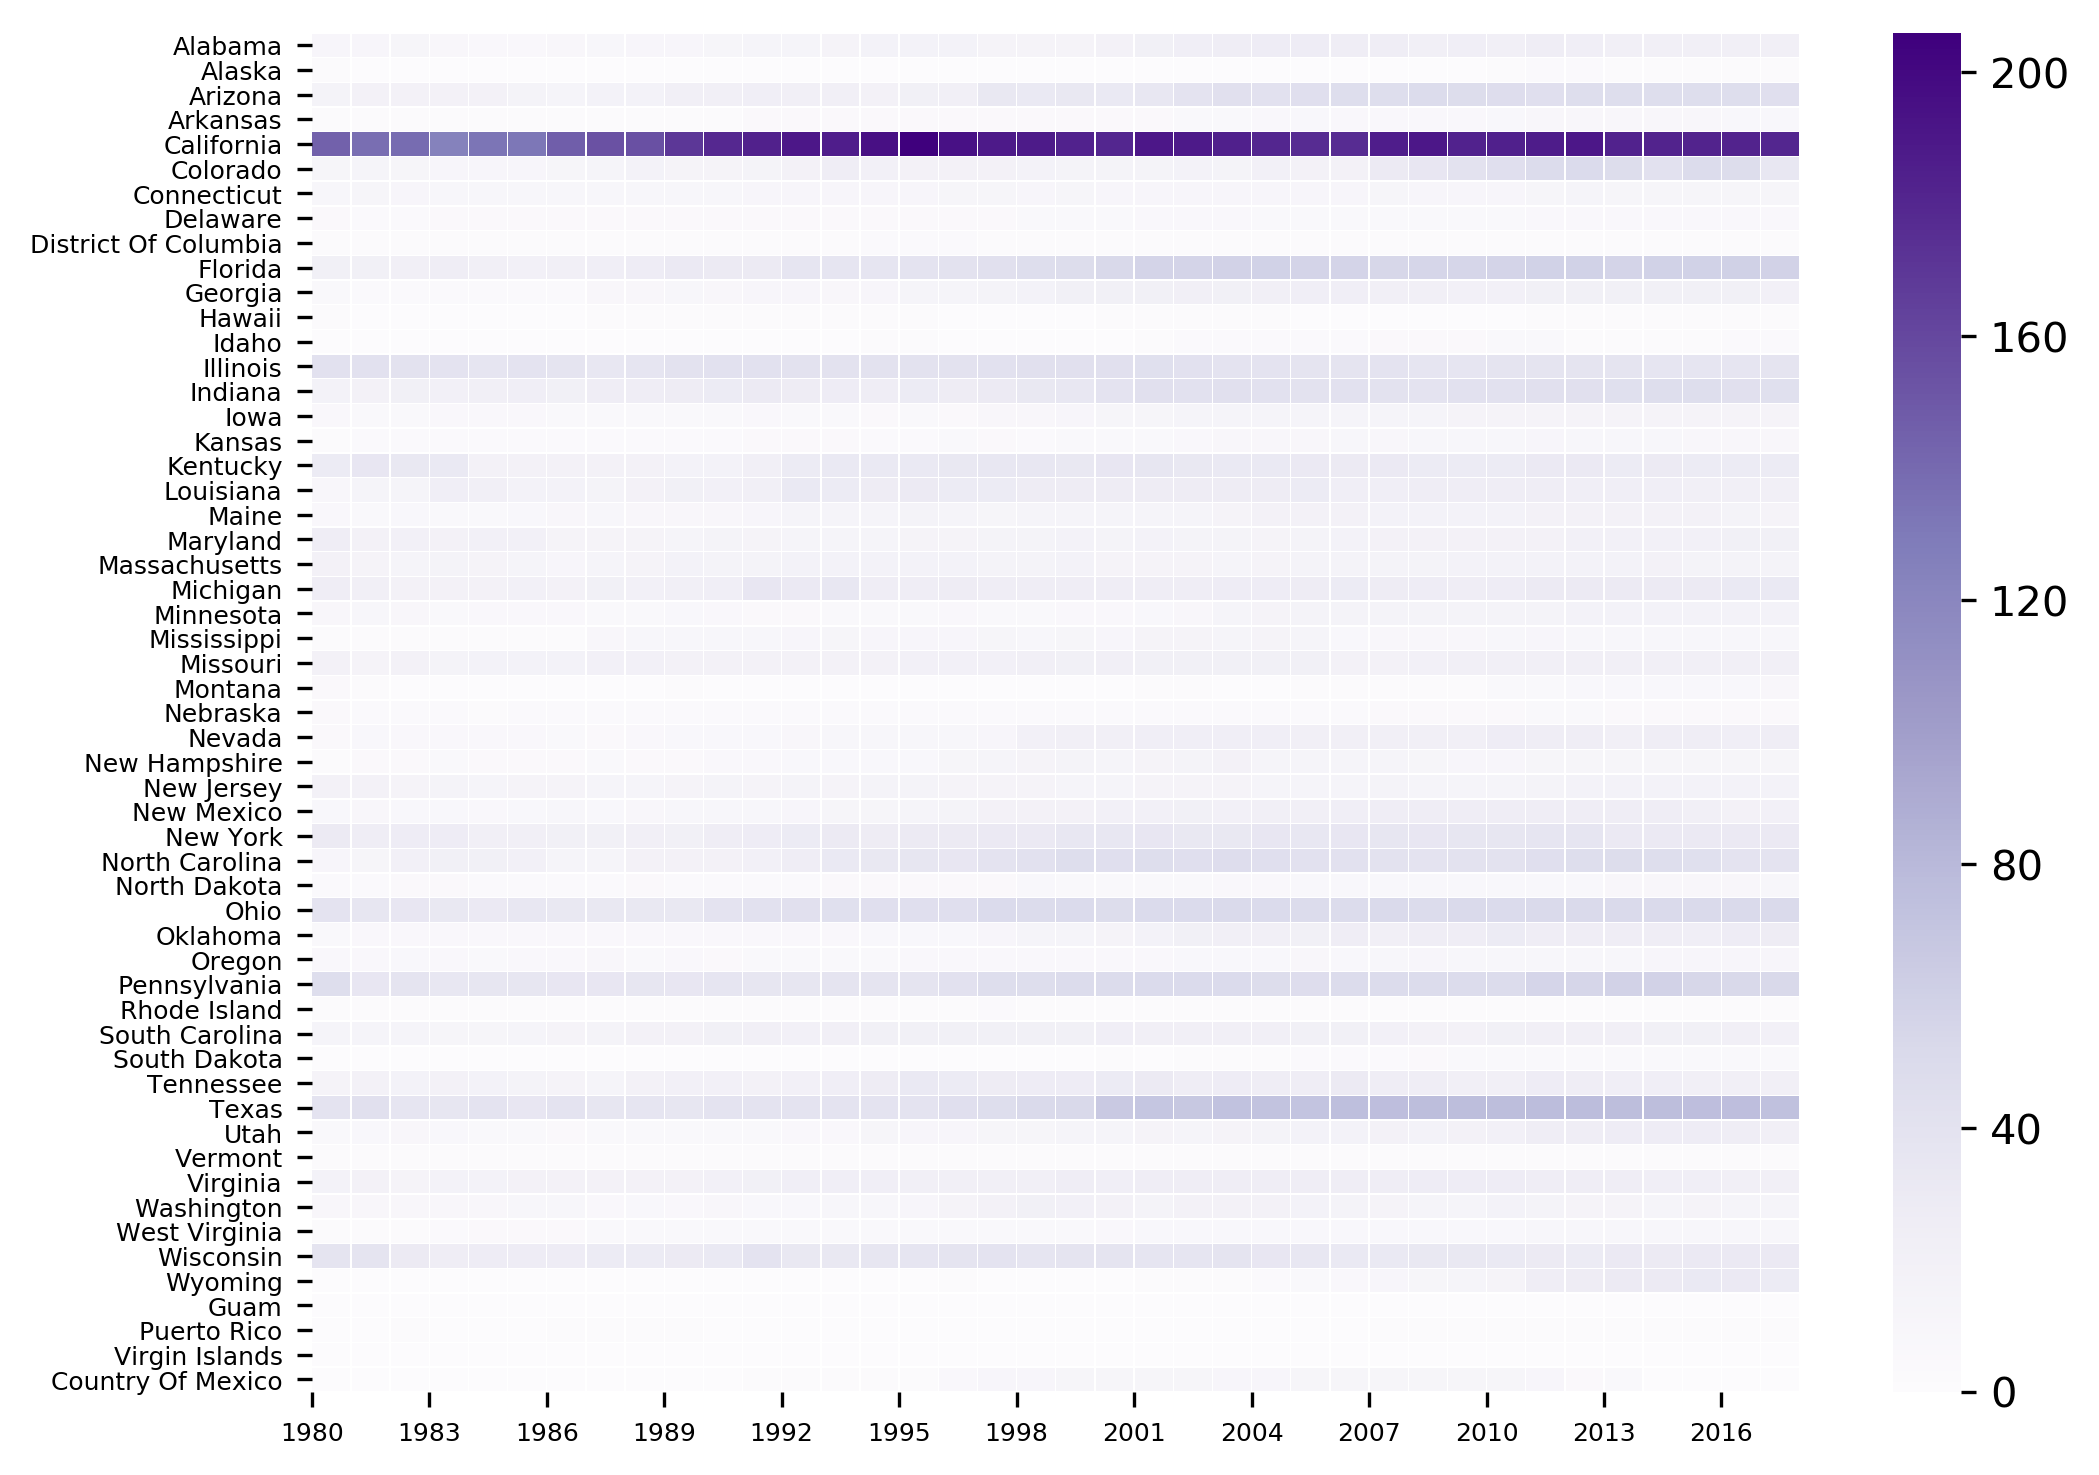

In [6]:
ndata=[]
for codes in data:
    ndata.append([data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]])
    
plt.close()
plt.subplots(figsize=(8,6),dpi=300) 

sns.heatmap(ndata,linewidth=0.1,cmap=plt.get_cmap('Purples'))
plt.yticks([i+0.5 for i in range(len(data))],[stateCodes[int(i)].replace('"','') for i in data],size=6)
plt.xticks(list(range(len(yearMap)))[::3],list(yearMap)[::3],size=6)
plt.show()

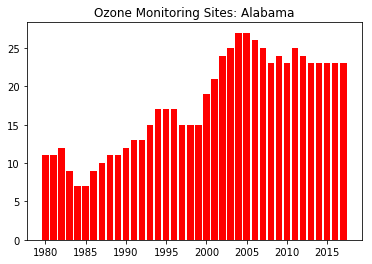

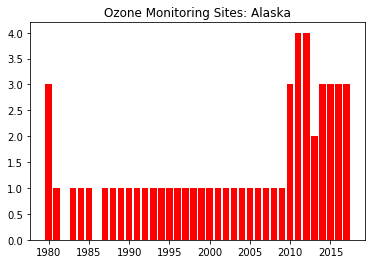

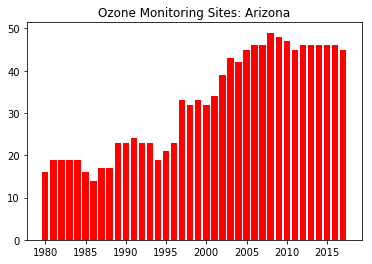

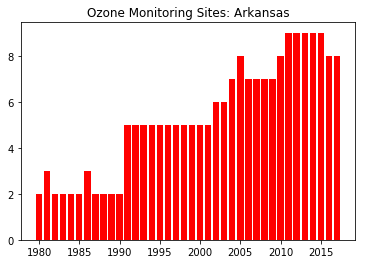

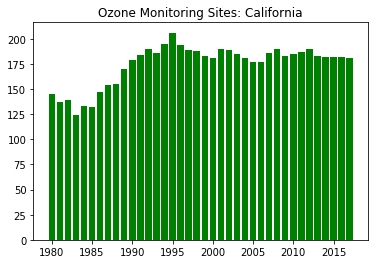

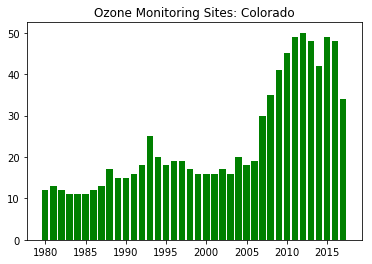

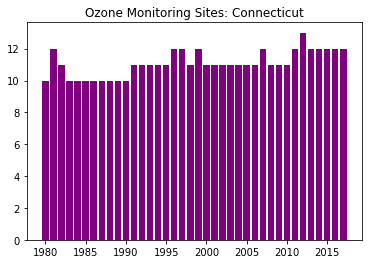

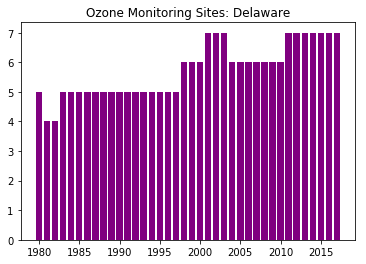

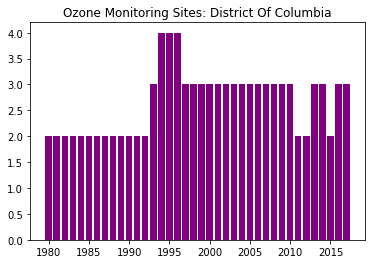

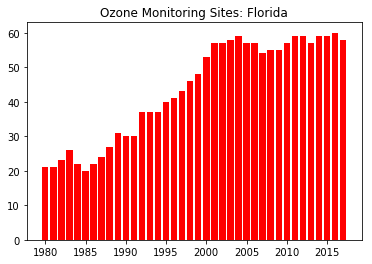

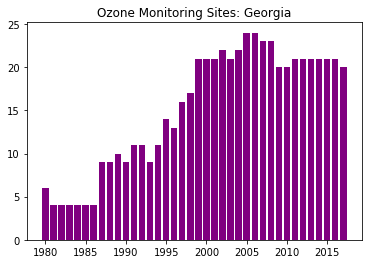

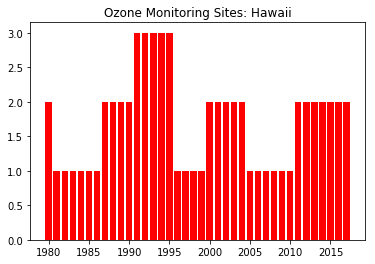

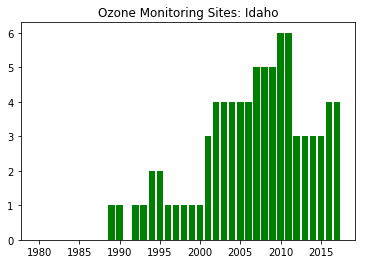

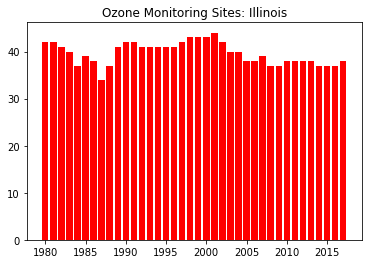

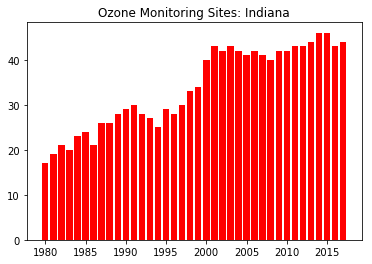

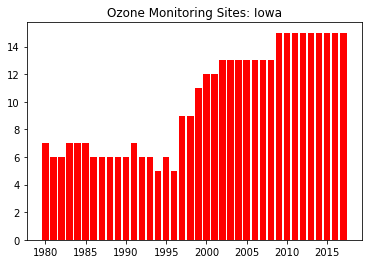

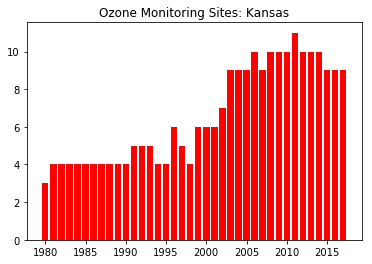

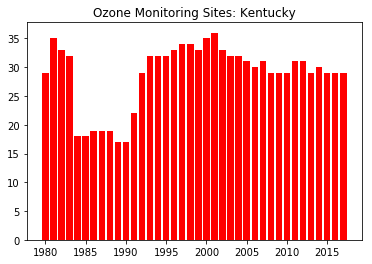

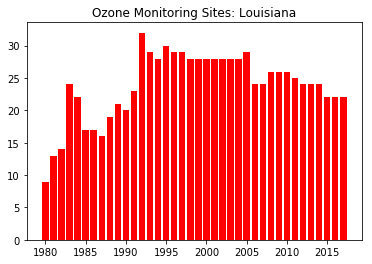

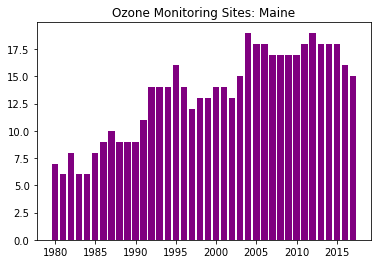

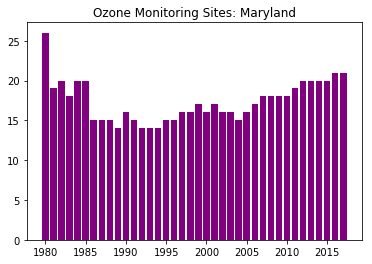

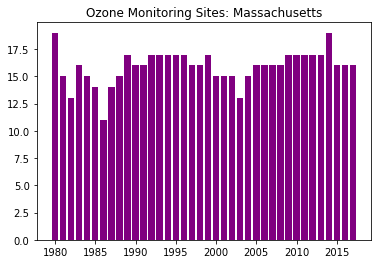

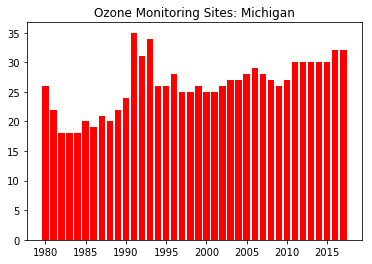

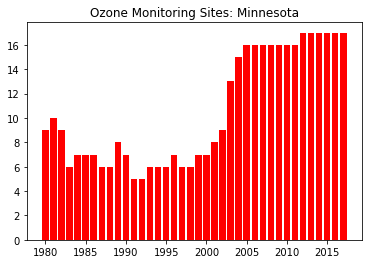

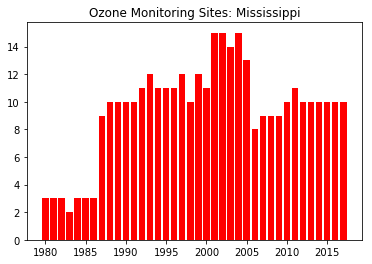

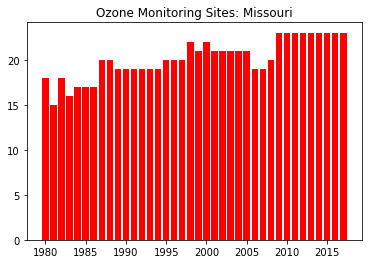

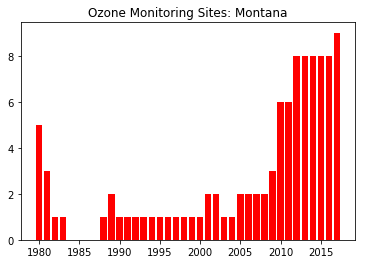

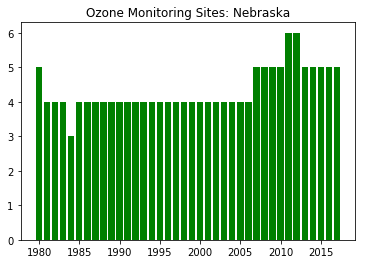

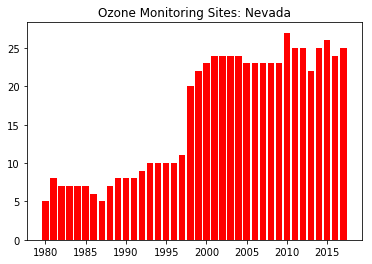

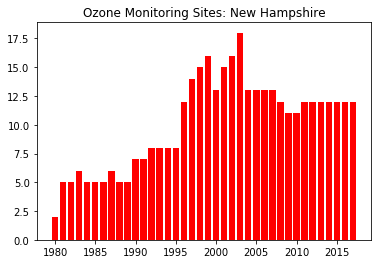

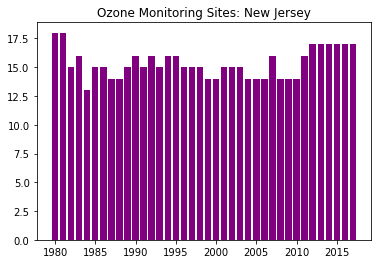

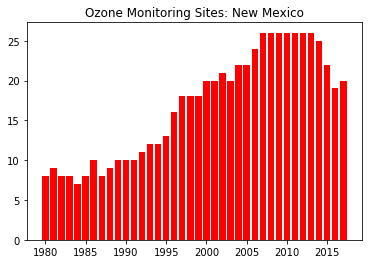

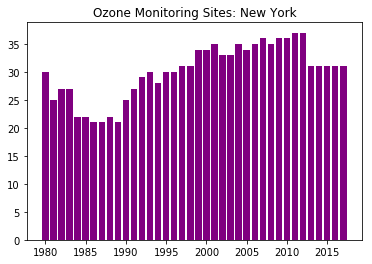

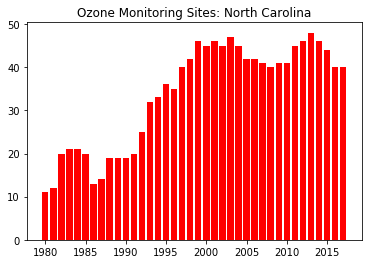

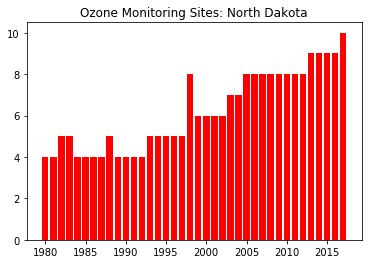

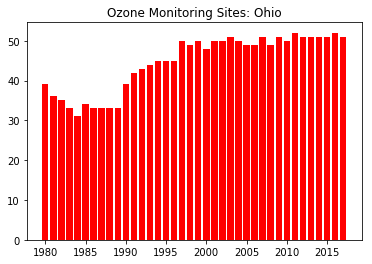

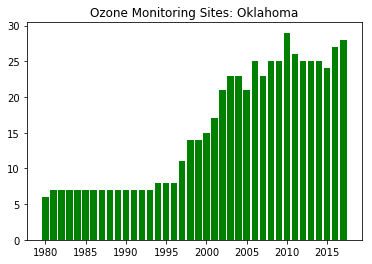

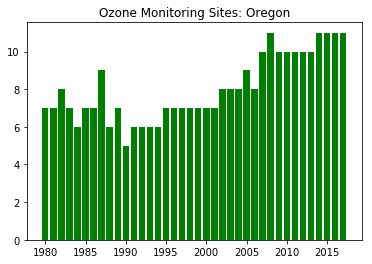

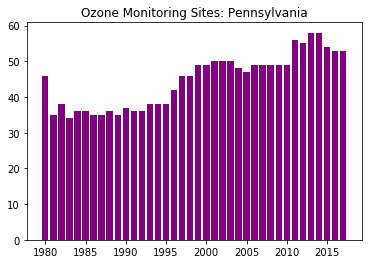

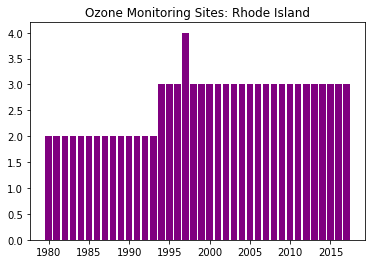

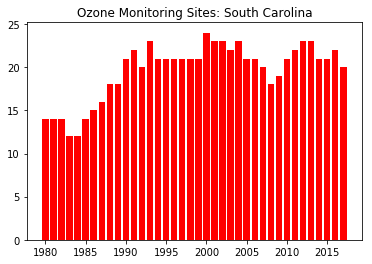

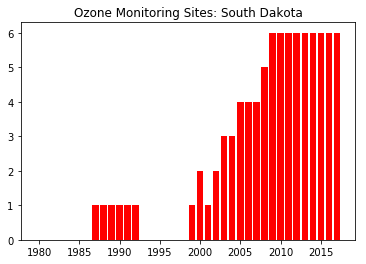

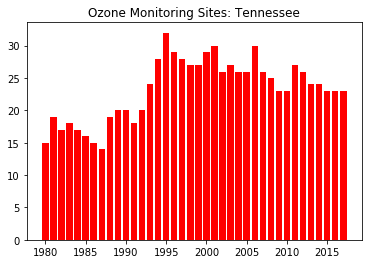

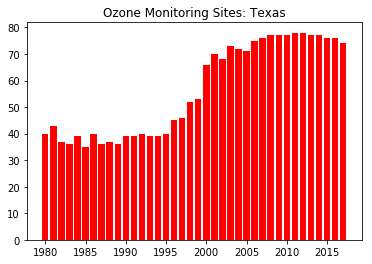

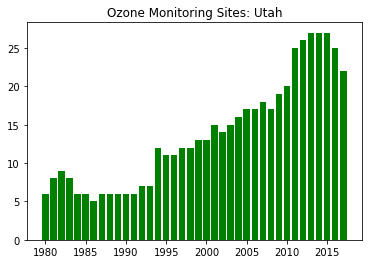

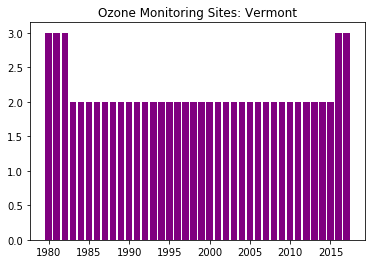

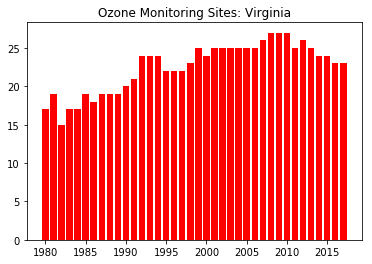

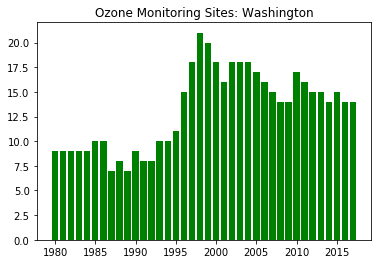

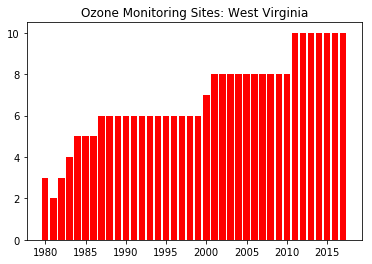

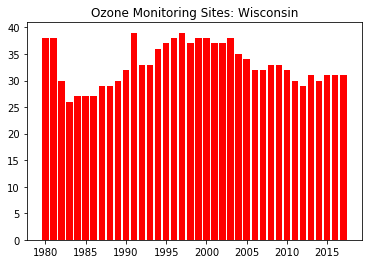

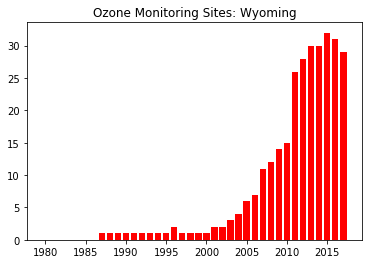

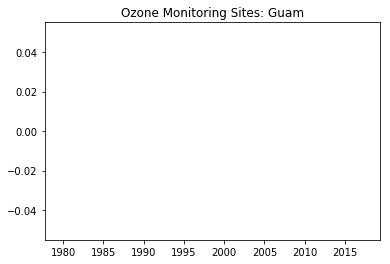

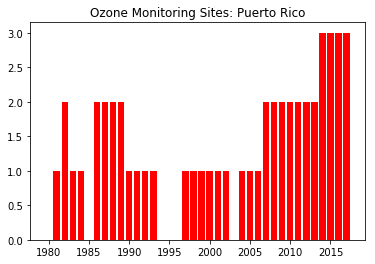

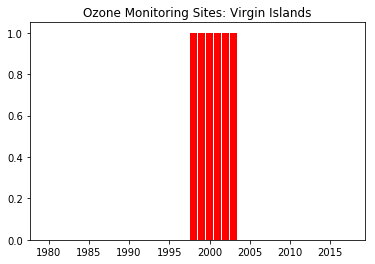

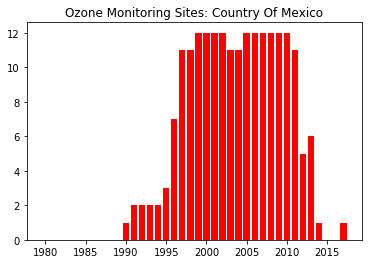

In [7]:

for codes in data:
    plt.close()
    #plt.subplots(figsize=(2,1),dpi=300)
    intCode = int(codes)
    if intCode in carbA:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='g')
    elif intCode in carbB:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='purple')
    else:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='r')

    plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
    plt.title("Ozone Monitoring Sites: {}".format(stateCodes[int(codes)].replace('"','')))
    plt.show()
    

In [8]:
plt.show()

In [9]:
pickle.dump(regionData,open("monitoringSitesRegion_newcarb.pickle",'wb'))

In [10]:
regionData

OrderedDict([('1980', {'A': 190, 'B': 174, 'O': 417}),
             ('1981', {'A': 185, 'B': 145, 'O': 436}),
             ('1982', {'A': 188, 'B': 147, 'O': 420}),
             ('1983', {'A': 170, 'B': 142, 'O': 420}),
             ('1984', {'A': 175, 'B': 137, 'O': 399}),
             ('1985', {'A': 177, 'B': 140, 'O': 396}),
             ('1986', {'A': 192, 'B': 131, 'O': 390}),
             ('1987', {'A': 200, 'B': 139, 'O': 407}),
             ('1988', {'A': 203, 'B': 141, 'O': 434}),
             ('1989', {'A': 217, 'B': 142, 'O': 456}),
             ('1990', {'A': 226, 'B': 149, 'O': 475}),
             ('1991', {'A': 231, 'B': 153, 'O': 512}),
             ('1992', {'A': 241, 'B': 159, 'O': 534}),
             ('1993', {'A': 246, 'B': 160, 'O': 556}),
             ('1994', {'A': 257, 'B': 163, 'O': 547}),
             ('1995', {'A': 267, 'B': 171, 'O': 569}),
             ('1996', {'A': 259, 'B': 172, 'O': 589}),
             ('1997', {'A': 261, 'B': 178, 'O': 622}),
          

In [11]:
regionData

OrderedDict([('1980', {'A': 190, 'B': 174, 'O': 417}),
             ('1981', {'A': 185, 'B': 145, 'O': 436}),
             ('1982', {'A': 188, 'B': 147, 'O': 420}),
             ('1983', {'A': 170, 'B': 142, 'O': 420}),
             ('1984', {'A': 175, 'B': 137, 'O': 399}),
             ('1985', {'A': 177, 'B': 140, 'O': 396}),
             ('1986', {'A': 192, 'B': 131, 'O': 390}),
             ('1987', {'A': 200, 'B': 139, 'O': 407}),
             ('1988', {'A': 203, 'B': 141, 'O': 434}),
             ('1989', {'A': 217, 'B': 142, 'O': 456}),
             ('1990', {'A': 226, 'B': 149, 'O': 475}),
             ('1991', {'A': 231, 'B': 153, 'O': 512}),
             ('1992', {'A': 241, 'B': 159, 'O': 534}),
             ('1993', {'A': 246, 'B': 160, 'O': 556}),
             ('1994', {'A': 257, 'B': 163, 'O': 547}),
             ('1995', {'A': 267, 'B': 171, 'O': 569}),
             ('1996', {'A': 259, 'B': 172, 'O': 589}),
             ('1997', {'A': 261, 'B': 178, 'O': 622}),
          